## Подготовка данных

In [1]:
### импорт библиотек
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import time
from sklearn.compose import make_column_transformer

In [2]:
### получение общих данных о таблице, а также проверка на наличие пропусков
df = pd.read_csv('autos.csv')
display(df.info())
display('Количество пропусков:', df.isna().sum())
before = df.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

None

'Количество пропусков:'

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
Repaired             71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

In [3]:
### выведем первые пять строк
display(df.head(5))

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


### Заполнение пропусков

array([nan, 'coupe', 'suv', 'small', 'sedan', 'convertible', 'bus',
       'wagon', 'other'], dtype=object)

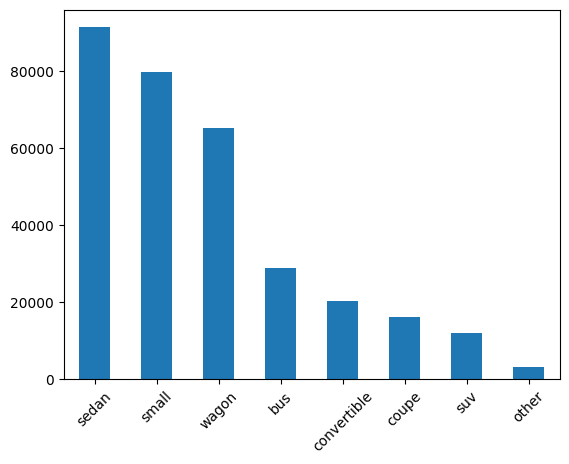

In [4]:
### Выведем уникальные значения столбца
display(df.VehicleType.unique())
### Построение столбчатого графика
df['VehicleType'].value_counts().plot.bar(rot=45);

array(['manual', 'auto', nan], dtype=object)

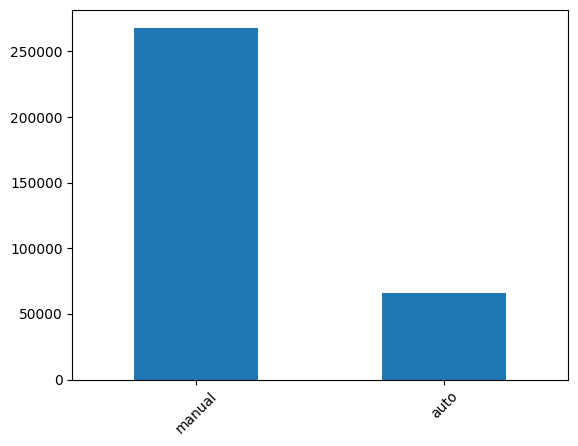

In [5]:
### Выведем уникальные значения столбца
display(df.Gearbox.unique())
### Построение столбчатого графика
df['Gearbox'].value_counts().plot.bar(rot=45);

In [6]:
### Выведем уникальные значения столбца
df.Model.unique()

array(['golf', nan, 'grand', 'fabia', '3er', '2_reihe', 'other', 'c_max',
       '3_reihe', 'passat', 'navara', 'ka', 'polo', 'twingo', 'a_klasse',
       'scirocco', '5er', 'meriva', 'arosa', 'c4', 'civic', 'transporter',
       'punto', 'e_klasse', 'clio', 'kadett', 'kangoo', 'corsa', 'one',
       'fortwo', '1er', 'b_klasse', 'signum', 'astra', 'a8', 'jetta',
       'fiesta', 'c_klasse', 'micra', 'vito', 'sprinter', '156', 'escort',
       'forester', 'xc_reihe', 'scenic', 'a4', 'a1', 'insignia', 'combo',
       'focus', 'tt', 'a6', 'jazz', 'omega', 'slk', '7er', '80', '147',
       '100', 'z_reihe', 'sportage', 'sorento', 'v40', 'ibiza', 'mustang',
       'eos', 'touran', 'getz', 'a3', 'almera', 'megane', 'lupo', 'r19',
       'zafira', 'caddy', 'mondeo', 'cordoba', 'colt', 'impreza',
       'vectra', 'berlingo', 'tiguan', 'i_reihe', 'espace', 'sharan',
       '6_reihe', 'panda', 'up', 'seicento', 'ceed', '5_reihe', 'yeti',
       'octavia', 'mii', 'rx_reihe', '6er', 'modus', 'fox'

array(['petrol', 'gasoline', nan, 'lpg', 'other', 'hybrid', 'cng',
       'electric'], dtype=object)

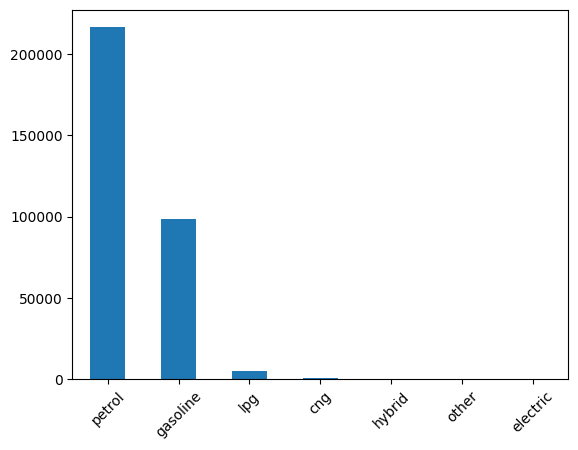

In [7]:
### Выведем уникальные значения столбца
display(df.FuelType.unique())
### Построение столбчатого графика
df['FuelType'].value_counts().plot.bar(rot=45);

array([nan, 'yes', 'no'], dtype=object)

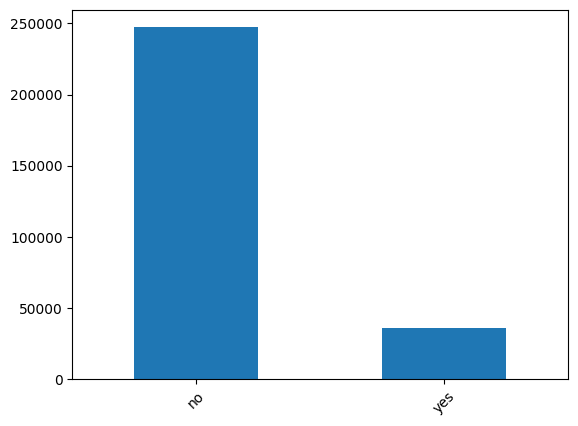

In [8]:
### Выведем уникальные значения столбца
display(df.Repaired.unique())
### Построение столбчатого графика
df['Repaired'].value_counts().plot.bar(rot=45);

In [9]:
### Заполнение пропусков в данных и проверка на наличие пропусков
df['VehicleType'] = df['VehicleType'].fillna('unknown')
df['Gearbox'] = df['Gearbox'].fillna('manual')
df['Model'] = df['Model'].fillna('unknown')
df['FuelType'] = df['FuelType'].fillna('unknown')
df['Repaired'] = df['Repaired'].fillna('no')
display('Количество пропусков:', df.isna().sum())

'Количество пропусков:'

DateCrawled          0
Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Kilometer            0
RegistrationMonth    0
FuelType             0
Brand                0
Repaired             0
DateCreated          0
NumberOfPictures     0
PostalCode           0
LastSeen             0
dtype: int64

### Поиск аномалий и дубликатов в данных

In [10]:
### Расчет количества дубликатов
display(f'Количество дубликатов до удаления: {df.duplicated().sum()}')
df = df.drop_duplicates()
display(f'Количество дубликатов после удаления: {df.duplicated().sum()}')

'Количество дубликатов до удаления: 5'

'Количество дубликатов после удаления: 0'

In [11]:
### Изучим столбец и удалим выбросы в информации по году регистрации
display(df['RegistrationYear'].unique())
years_before_list_index = df.query("RegistrationYear < 1950").index
years_after_list_index = df.query("RegistrationYear > 2016").index
display('Количество удаляемых строк:', len(years_before_list_index.tolist()) + len(years_after_list_index.tolist()))
df = df.drop(index=years_before_list_index)
df = df.drop(index=years_after_list_index)
df.info()

array([1993, 2011, 2004, 2001, 2008, 1995, 1980, 2014, 1998, 2005, 1910,
       2016, 2007, 2009, 2002, 2018, 1997, 1990, 2017, 1981, 2003, 1994,
       1991, 1984, 2006, 1999, 2012, 2010, 2000, 1992, 2013, 1996, 1985,
       1989, 2015, 1982, 1976, 1983, 1973, 1111, 1969, 1971, 1987, 1986,
       1988, 1970, 1965, 1945, 1925, 1974, 1979, 1955, 1978, 1972, 1968,
       1977, 1961, 1960, 1966, 1975, 1963, 1964, 5000, 1954, 1958, 1967,
       1959, 9999, 1956, 3200, 1000, 1941, 8888, 1500, 2200, 4100, 1962,
       1929, 1957, 1940, 3000, 2066, 1949, 2019, 1937, 1951, 1800, 1953,
       1234, 8000, 5300, 9000, 2900, 6000, 5900, 5911, 1933, 1400, 1950,
       4000, 1948, 1952, 1200, 8500, 1932, 1255, 3700, 3800, 4800, 1942,
       7000, 1935, 1936, 6500, 1923, 2290, 2500, 1930, 1001, 9450, 1944,
       1943, 1934, 1938, 1688, 2800, 1253, 1928, 1919, 5555, 5600, 1600,
       2222, 1039, 9996, 1300, 8455, 1931, 1915, 4500, 1920, 1602, 7800,
       9229, 1947, 1927, 7100, 8200, 1946, 7500, 35

'Количество удаляемых строк:'

14776

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339588 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        339588 non-null  object
 1   Price              339588 non-null  int64 
 2   VehicleType        339588 non-null  object
 3   RegistrationYear   339588 non-null  int64 
 4   Gearbox            339588 non-null  object
 5   Power              339588 non-null  int64 
 6   Model              339588 non-null  object
 7   Kilometer          339588 non-null  int64 
 8   RegistrationMonth  339588 non-null  int64 
 9   FuelType           339588 non-null  object
 10  Brand              339588 non-null  object
 11  Repaired           339588 non-null  object
 12  DateCreated        339588 non-null  object
 13  NumberOfPictures   339588 non-null  int64 
 14  PostalCode         339588 non-null  int64 
 15  LastSeen           339588 non-null  object
dtypes: int64(7), object(

In [12]:
### Изучим столбец и поправим данные с указанием месяца регистрации
display('Уникальные значения до преобразования:', df['RegistrationMonth'].unique())
df['RegistrationMonth'] = df['RegistrationMonth'].replace(0, 1)
display('Уникальные значения после преобразования:', df['RegistrationMonth'].unique())

'Уникальные значения до преобразования:'

array([ 0,  5,  8,  6,  7, 10, 12, 11,  2,  3,  1,  4,  9], dtype=int64)

'Уникальные значения после преобразования:'

array([ 1,  5,  8,  6,  7, 10, 12, 11,  2,  3,  4,  9], dtype=int64)

In [13]:
### Изучим столбец и удалим выбросы в данных о мощности
display(df['Power'].unique())
power_high_list_index = df.query("Power > 999").index
display('Количество удаляемых строк:', len(power_high_list_index.tolist()))
df = df.drop(index=power_high_list_index)
df.info()

array([    0,   190,   163,    75,    69,   102,   109,    50,   125,
         101,   105,   140,   115,   131,    60,   136,   160,   231,
         118,   193,    99,   113,   218,   122,   129,    70,   306,
          95,    61,   177,   170,    55,   143,   286,   232,   150,
         156,    80,    82,    90,   155,    54,   185,    87,   180,
          86,    84,   224,   235,   200,   178,   265,    77,   110,
         144,   120,   116,   184,   126,   204,    88,   194,    64,
         305,   197,   179,   250,    45,   313,    41,   165,    98,
         130,   114,   211,    56,   201,   213,    58,   107,    83,
         174,   100,   220,    73,   192,    68,    66,   299,    74,
          52,   147,   310,    71,    97,    65,   239,   203,     5,
         300,   103,    85,   258,   320,    63,    81,   148,    44,
         145,   230,   280,   260,   104,   188,   333,   186,   117,
         141,   132,   234,   158,    39,    92,    51,   135,    59,
          53,   209,

'Количество удаляемых строк:'

280

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339308 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        339308 non-null  object
 1   Price              339308 non-null  int64 
 2   VehicleType        339308 non-null  object
 3   RegistrationYear   339308 non-null  int64 
 4   Gearbox            339308 non-null  object
 5   Power              339308 non-null  int64 
 6   Model              339308 non-null  object
 7   Kilometer          339308 non-null  int64 
 8   RegistrationMonth  339308 non-null  int64 
 9   FuelType           339308 non-null  object
 10  Brand              339308 non-null  object
 11  Repaired           339308 non-null  object
 12  DateCreated        339308 non-null  object
 13  NumberOfPictures   339308 non-null  int64 
 14  PostalCode         339308 non-null  int64 
 15  LastSeen           339308 non-null  object
dtypes: int64(7), object(

In [14]:
### Заменим нулевые значения мощности на значение первого квантиля
power_min = df['Power'].quantile(0.25)
df['Power'] = df['Power'].replace(0, power_min)
display(df.loc[df['Power'] == 0, 'Power'].count())

0

In [15]:
### Удалим нулевые значения мощности
# power_null_list_index = df.query("Power == 0").index
# display('Количество удаляемых строк cо значением нуля:', len(power_null_list_index.tolist()))
# df = df.drop(index=power_null_list_index)
# df.info()

### Приведение к верному типу данных

In [16]:
### Изменим на верный тип данных столбцов с датой
df['DateCrawled'] = pd.to_datetime(df['DateCrawled'])
df['DateCreated'] = pd.to_datetime(df['DateCreated'])
df['LastSeen'] = pd.to_datetime(df['LastSeen'])
### Изменим тип данных на int
df['Power'] = df['Power'].astype('int')

In [17]:
### Рассчитаем процент удаленных данных
after = df.shape[0]
display(f'Количество удаленных данных составляет: {round(100 - (after/before)*100, 2)} %')

'Количество удаленных данных составляет: 4.25 %'

### Вывод

В процессе подготовки данных выявлены и внесены следующие изменения:
- Обнаружены и удалены дубликаты в количестве `5` шт
- В столбце с мощностью удалено `280` выбросов, в столбце с годом регистрации удалено `14776` выбросов
- Процент удаленных данных менее `10%` и составляет `4.25%`
- Тип столбцов с датами преобразован из `object` в `datetime`
- Тип данных в столбце с мощность преобразован из `float` в `int`
- В столбцах с типом кузова, моделью и типом топлива пропуски заменены на `unknown`
- В столбце с типом КПП пропуски заменены на `manual`, в столбце наличия ремонта пропуски заменены на `no`

## Обучение моделей

### Подготовка выборок

In [18]:
### Удалим лишние столбцы
df_cor = df.drop(['DateCrawled', 'DateCreated', 'NumberOfPictures', 'PostalCode', 'LastSeen', 'RegistrationMonth'], axis=1).copy()
df_cor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339308 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             339308 non-null  int64 
 1   VehicleType       339308 non-null  object
 2   RegistrationYear  339308 non-null  int64 
 3   Gearbox           339308 non-null  object
 4   Power             339308 non-null  int32 
 5   Model             339308 non-null  object
 6   Kilometer         339308 non-null  int64 
 7   FuelType          339308 non-null  object
 8   Brand             339308 non-null  object
 9   Repaired          339308 non-null  object
dtypes: int32(1), int64(3), object(6)
memory usage: 27.2+ MB


In [19]:
### обозначим признаки и цели 
target = df_cor['Price']
features = df_cor.drop(['Price'], axis=1)
### поделим на выборки
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.4, random_state=42)
features_test, features_valid, target_test, target_valid = train_test_split(features_test, target_test, test_size=0.5, random_state=42)
### проверим размерности выборок
display(f'features_train shape: {features_train.shape}')
display(f'target_train shape: {target_train.shape}')
display(f'features_test shape: {features_test.shape}')
display(f'target_test shape: {target_test.shape}')
display(f'features_valid shape: {features_valid.shape}')
display(f'target_valid shape: {target_valid.shape}')

'features_train shape: (203584, 9)'

'target_train shape: (203584,)'

'features_test shape: (67862, 9)'

'target_test shape: (67862,)'

'features_valid shape: (67862, 9)'

'target_valid shape: (67862,)'

In [20]:
### Подготовим выборки
categorial_cols = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'Repaired']
numeric_cols = ['RegistrationYear', 'Power', 'Kilometer']
features_train_ohe = features_train[categorial_cols]
features_valid_ohe = features_valid[categorial_cols]
features_test_ohe = features_test[categorial_cols]
### Обучим кодировщик OHE
encoder = OneHotEncoder(drop='first', handle_unknown='error', sparse=False)
encoder.fit(features_train_ohe)
cols = encoder.get_feature_names()
### Преобразуем выборки, шаг 1
features_train_ohe = encoder.transform(features_train_ohe)
features_valid_ohe = encoder.transform(features_valid_ohe)
features_test_ohe = encoder.transform(features_test_ohe)
### Преобразуем выборки, шаг 2
features_train_ohe = pd.DataFrame(features_train_ohe, columns = cols, index=target_train.index)
features_valid_ohe = pd.DataFrame(features_valid_ohe, columns = cols, index=target_valid.index)
features_test_ohe = pd.DataFrame(features_test_ohe, columns = cols, index=target_test.index)
### Проверим размерности выборок
display(f'features_train_ohe shape: {features_train_ohe.shape}')
display(f'features_valid_ohe shape: {features_valid_ohe.shape}')
display(f'features_test_ohe shape: {features_test_ohe.shape}')

'features_train_ohe shape: (203584, 306)'

'features_valid_ohe shape: (67862, 306)'

'features_test_ohe shape: (67862, 306)'

In [21]:
### Подготовим выборки
features_train_num = features_train[numeric_cols]
features_valid_num = features_valid[numeric_cols]
features_test_num = features_test[numeric_cols]
### Стандартизируем данные и настроим на признаках
scaler = StandardScaler()
scaler.fit(features_train_num) 
### Преобразуем выборки
features_train_num = scaler.transform(features_train_num)
features_valid_num = scaler.transform(features_valid_num)                                 
features_test_num = scaler.transform(features_test_num) 
### Уберем предупреждение `SettingWithCopy`
pd.options.mode.chained_assignment = None
### Получим заголовки для признаков и скорректируем преобразованные выборки
features_train_num = pd.DataFrame(features_train_num, columns = numeric_cols, index=target_train.index)
features_valid_num = pd.DataFrame(features_valid_num, columns = numeric_cols, index=target_valid.index)                                 
features_test_num = pd.DataFrame(features_test_num, columns = numeric_cols, index=target_test.index)
### Проверим размерности выборок
display(f'features_train_num shape: {features_train_num.shape}')
display(f'features_valid_num shape: {features_valid_num.shape}')
display(f'features_test_num shape: {features_test_num.shape}')

'features_train_num shape: (203584, 3)'

'features_valid_num shape: (67862, 3)'

'features_test_num shape: (67862, 3)'

In [22]:
### Объединим выборки, числовые столбцы и категориальные столбцы
features_train_one = pd.concat((features_train_ohe, features_train_num), axis = 1)
features_valid_one = pd.concat((features_valid_ohe, features_valid_num), axis = 1)
features_test_one = pd.concat((features_test_ohe, features_test_num), axis = 1)

### Модель Случайного леса

In [23]:
%%time
start1 = time.time()
### обучим модель случайного леса (время обучения)
rfr_model = RandomForestRegressor(random_state=42, max_depth=20, n_estimators=100, min_samples_leaf=6)
rfr_model.fit(features_train_one, target_train)
end1 = time.time() - start1

CPU times: total: 10min 58s
Wall time: 11min 2s


In [24]:
%%time
start4 = time.time()
### обучим модель случайного леса (время предсказания)
predictions_rfr = rfr_model.predict(features_valid_one)
rmse_one = mean_squared_error(target_valid, predictions_rfr) ** 0.5
display("RMSE модели случайного леса на валидационной выборке:", rmse_one)
end4 = time.time() - start4

'RMSE модели случайного леса на валидационной выборке:'

1760.1476809188657

CPU times: total: 2.5 s
Wall time: 2.53 s


In [25]:
# попытка гридсерча, но после ожидания 2 часов выполнения кода, бросил эту затею

# %%time
# ### создадим функцию расчета rmse
# def rmse(target, predictions):
#     rmse = mean_squared_error(target, predictions) ** 0.5
#     return rmse

# def score():
#     return make_scorer(rmse, greater_is_better=False)
# ### обучим модель случайного леса с помощью gridsearch для расчета f1 меры
# # параметры по сетке
# parameters = {
#     'n_estimators': [50, 100],
#     'max_depth': [10, 20],
#     'min_samples_leaf': [4, 5]
# }
# ran_for = RandomForestRegressor(random_state=42)
# clf = GridSearchCV(ran_for, parameters, scoring=score(), cv=5, n_jobs=-1)
# clf.fit(features_train, target_train)
# display(clf.best_score_)
# display(clf.best_params_)

### Модель CatBoost

In [26]:
%%time
start2 = time.time()
### обучим модель CatBoost (время обучения)
cat_model = CatBoostRegressor(random_state=42, depth=10, learning_rate=0.1, verbose=100)       
cat_model.fit(features_train, target_train, cat_features=categorial_cols,)
end2 = time.time() - start2

0:	learn: 4223.7112493	total: 380ms	remaining: 6m 20s
100:	learn: 1730.0647427	total: 20.1s	remaining: 2m 59s
200:	learn: 1646.0672478	total: 39.8s	remaining: 2m 38s
300:	learn: 1592.6772057	total: 59.7s	remaining: 2m 18s
400:	learn: 1553.6072916	total: 1m 21s	remaining: 2m 1s
500:	learn: 1522.9839573	total: 1m 41s	remaining: 1m 41s
600:	learn: 1498.0263798	total: 2m 2s	remaining: 1m 21s
700:	learn: 1477.3764323	total: 2m 23s	remaining: 1m 1s
800:	learn: 1458.3453652	total: 2m 44s	remaining: 40.8s
900:	learn: 1440.0599050	total: 3m 4s	remaining: 20.3s
999:	learn: 1423.6146415	total: 3m 25s	remaining: 0us
CPU times: total: 18min 12s
Wall time: 3min 27s


In [27]:
%%time
start5 = time.time()
### обучим модель CatBoost (время предсказания)
predictions_cat = cat_model.predict(features_valid)
rmse_two = mean_squared_error(target_valid, predictions_cat) ** 0.5
display("RMSE модели CatBoost на валидационной выборке:", rmse_two)
end5 = time.time() - start5

'RMSE модели CatBoost на валидационной выборке:'

1686.6150665315067

CPU times: total: 2.53 s
Wall time: 482 ms


### Модель LightGBM

In [28]:
%%time
start3 = time.time()
### обучим модель LightGBM (время обучения)
lgb_model = LGBMRegressor(random_state=42, max_depth=10, learning_rate=0.1, metric='l2')      
lgb_model.fit(features_train_one, target_train)
end3 = time.time() - start3

CPU times: total: 8.45 s
Wall time: 2.17 s


In [29]:
%%time
start6 = time.time()
### обучим модель LightGBM (время предсказания)
predictions_lgb = lgb_model.predict(features_valid_one)
rmse_thr = mean_squared_error(target_valid, predictions_lgb) ** 0.5
display("RMSE модели LightGBM на валидационной выборке:", rmse_thr)
end6 = time.time() - start6

'RMSE модели LightGBM на валидационной выборке:'

1823.133342168771

CPU times: total: 1.41 s
Wall time: 363 ms


### Тестирование моделей

In [33]:
### тестирование моделей на тестовых выборках
# rfr_predictions_test = pd.Series(rfr_model.predict(features_test), index=features_test.index) 
# rmse_one_test = mean_squared_error(target_test, rfr_predictions_test) ** 0.5
cat_predictions_test = pd.Series(cat_model.predict(features_test), index=features_test.index) 
rmse_two_test = mean_squared_error(target_test, cat_predictions_test) ** 0.5
# lgb_predictions_test = pd.Series(lgb_model.predict(features_test), index=features_test.index) 
# rmse_thr_test = mean_squared_error(target_test, lgb_predictions_test) ** 0.5

### выведем результаты на экран
# display(f'Результат модели случайного леса на тестовой выборке: {rmse_one_test}')
display(f'Результат модели CatBoost на тестовой выборке: {rmse_two_test}')
# display(f'Результат модели LightGBM леса на тестовой выборке: {rmse_thr_test}')

'Результат модели CatBoost на тестовой выборке: 1675.7954442119471'

## Анализ моделей

In [34]:
### выведем результаты как таблицу с данными
total_row_1 = ['rmse_valid', rmse_one, rmse_two, rmse_thr]
total_row_2 = ['time_learn', end1, end2, end3]
total_row_3 = ['time_pred', end4, end5, end6]
total_row_4 = ['rmse_test', 'not enought', rmse_two_test, 'not enought']
data_temp = pd.DataFrame([total_row_1, total_row_2, total_row_3, total_row_4])
data_temp.columns = ['metrics', 'random_forest', 'catboost', 'lightgbm']
display(data_temp.set_index('metrics'))

,random_forest,catboost,lightgbm
metrics,,,
rmse_valid,1760.147681,1686.615067,1823.133342
time_learn,662.506566,207.363023,2.174999
time_pred,2.530999,0.481998,0.362
rmse_test,not enought,1675.795444,not enought
